<a href="https://colab.research.google.com/github/Salmaabidah/CrawlingTweeter/blob/main/Analisis_Sentimen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Label Data

In [ ]:
import pandas as pd
!wget -P data/ https://raw.githubusercontent.com/Salmaabidah/CrawlingTweeter/main/translate_data.csv

--2023-07-28 05:48:57--  https://raw.githubusercontent.com/Salmaabidah/CrawlingTweeter/main/translate_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100954 (99K) [text/plain]
Saving to: ‘data/translate_data.csv.3’

translate_data.csv. 100%[===================>]  98.59K  --.-KB/s    in 0.02s   

2023-07-28 05:48:58 (5.38 MB/s) - ‘data/translate_data.csv.3’ saved [100954/100954]



In [ ]:
data = pd.read_csv('data/translate_data.csv', delimiter='\t')

In [ ]:
data.head()

,word_remove,Polarity,Sentimen
0,phuwin's cv is active in the world of entertai...,-0.133333,Negatif
1,the schedule for writing on wednesday at chang...,-0.300000,Negatif
2,spill the facts mbkm thorough research,0.000000,Positif
3,mbkm exchange lessons,0.000000,Positif
4,laugh take care of yourself funny go back and ...,0.183333,Positif


In [ ]:
data['word_remove'] = data['word_remove'].str.lower()

In [ ]:
import pandas as pd
from textblob import TextBlob

# Fungsi untuk melakukan klasifikasi sentimen berdasarkan polarity
def classify_sentiment(polarity):
    if polarity >= 0.00:
        return 'Positif'
    elif polarity <= 0:
        return 'Negatif'

# Fungsi untuk menganalisis sentimen dan menambahkan kolom hasilnya ke data
def analyze_sentiment(data, text_column):
    polarities = []
    sentiments = []

    for text in data[text_column]:
        blob = TextBlob(str(text))
        polarities.append(blob.sentiment.polarity)
        sentiments.append(classify_sentiment(blob.sentiment.polarity))

    data['Polarity'] = polarities
    data['Sentimen'] = sentiments

# Ubah 'nama_file.xlsx' dan 'nama_sheet' sesuai dengan file Excel Anda
text_column_name = 'word_remove'


# Menganalisis sentimen dan menambahkan kolom hasilnya ke data
analyze_sentiment(data, text_column_name)

# Menampilkan hasil
print(data)


                                           word_remove  Polarity Sentimen
0    phuwin's cv is active in the world of entertai... -0.133333  Negatif
1    the schedule for writing on wednesday at chang... -0.300000  Negatif
2               spill the facts mbkm thorough research  0.000000  Positif
3                                mbkm exchange lessons  0.000000  Positif
4    laugh take care of yourself funny go back and ...  0.183333  Positif
..                                                 ...       ...      ...
924  it's okay to get dizzy semester semester accep...  0.250000  Positif
925  astungkaraa seriously hope it's really competi... -0.066667  Negatif
926  dim nadim take care of gojek aja dadi tri an i...  0.050000  Positif
927  bismillah, hopefully pass the independent camp...  0.000000  Positif
928  need jockey cv independent campus will be fixe...  0.050000  Positif

[929 rows x 3 columns]


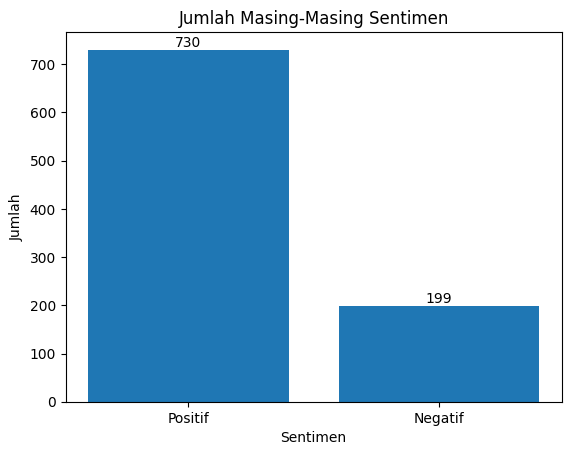

In [ ]:
# Menghitung jumlah masing-masing sentimen
sentimen_count = data['Sentimen'].value_counts()

# Membuat bar plot
plt.bar(sentimen_count.index, sentimen_count.values)

# Memberikan label pada sumbu x dan y serta judul plot
for i, value in enumerate(sentimen_count.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Memberikan label pada sumbu x dan y serta judul plot
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Jumlah Masing-Masing Sentimen')

plt.show()

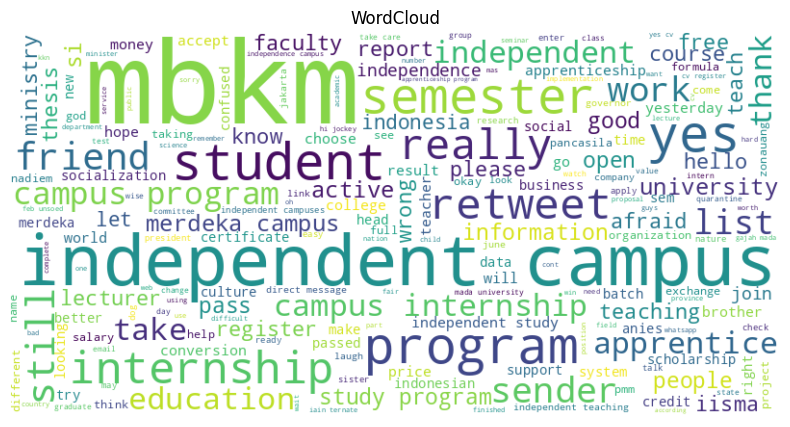

In [ ]:
# Visualisasi WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# WordCloud tweet positif
positive_tweets = ' '.join(data['word_remove'])
plot_wordcloud(positive_tweets, 'WordCloud')

Berdasarkan word could ini menunjukan adanya frekuensi kata yang paling banyak muncul atau paling banyak disebut yaitu mbkm, independent, campus, dan program dari total 929 tweet.

# Decision Tree X SVM X KNN

In [ ]:
from sklearn.model_selection import train_test_split

seed = 99 # Biasakan menggunakan ini
testSize = 0.2

x_train, x_test, y_train, y_test = train_test_split(data["word_remove"], data["Sentimen"],
                                                    test_size=testSize, random_state = seed)
print(x_train.shape, x_test.shape)

(743,) (186,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vsm = TfidfVectorizer(lowercase=True, smooth_idf= True, sublinear_tf=True,
                                   ngram_range=(1, 2), max_df=0.90, min_df=2)

x_train = vsm.fit_transform(x_train) # "Fit_Transform"
x_test = vsm.transform(x_test) # Perhatikan disini hanya "Transform"

print(x_train.shape, x_test.shape) # Jumlah kolom Sama ==> ini penting

(743, 2253) (186, 2253)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm = SVC()
svm.fit(x_train, y_train)
svm_prediction = svm.predict(x_test)

print('Akurasi = ', accuracy_score(y_test, svm_prediction))
print(confusion_matrix(y_test, svm_prediction))
print(classification_report(y_test, svm_prediction))

Akurasi =  0.7903225806451613
[[  2  39]
 [  0 145]]
              precision    recall  f1-score   support

     Negatif       1.00      0.05      0.09        41
     Positif       0.79      1.00      0.88       145

    accuracy                           0.79       186
   macro avg       0.89      0.52      0.49       186
weighted avg       0.83      0.79      0.71       186



In [ ]:
from sklearn import tree

DT = tree.DecisionTreeClassifier()
# Sengaja menggunakan default parameter, (Hyper)parameter Optimization akan dibahas kemudian
DT = DT.fit(x_train, y_train)
y_DT = DT.predict(x_test)
print(accuracy_score(y_test, y_DT))
print(confusion_matrix(y_test, y_DT))
print(classification_report(y_test, y_DT))

0.8709677419354839
[[ 30  11]
 [ 13 132]]
              precision    recall  f1-score   support

     Negatif       0.70      0.73      0.71        41
     Positif       0.92      0.91      0.92       145

    accuracy                           0.87       186
   macro avg       0.81      0.82      0.82       186
weighted avg       0.87      0.87      0.87       186



In [ ]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


model = neighbors.KNeighborsClassifier()
kNN = model.fit(x_train, y_train)
y_kNN = kNN.predict(x_test)

print('Akurasi = ', accuracy_score(y_test, y_kNN))
print(confusion_matrix(y_test, y_kNN))
print(classification_report(y_test, y_kNN))

Akurasi =  0.8118279569892473
[[  8  33]
 [  2 143]]
              precision    recall  f1-score   support

     Negatif       0.80      0.20      0.31        41
     Positif       0.81      0.99      0.89       145

    accuracy                           0.81       186
   macro avg       0.81      0.59      0.60       186
weighted avg       0.81      0.81      0.76       186



Akumodel SVM berhasil memprediksi sentimen dengan akurasi sekitar 79%. Decision Tree berhasil memprediksi sentimen dengan akurasi sekitar 87%.  Model K-Nearest Neighbors juga berhasil memprediksi sentimen dengan akurasi sekitar 87%. Hal tersebut menunjukan model Decision Tree dan KNN memiliki kinerja yang lebih baik dalam memprediksi sentimen dibandingkan dengan model SVM.